In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
data = pd.read_csv('datasetproject.csv')

In [3]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [4]:
data.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [5]:
data.isna()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9695,False,False,False,False,False,False,False,False,False,False,False
9696,False,False,False,False,False,False,False,False,False,False,False
9697,False,False,False,False,False,False,False,False,False,False,False
9698,False,False,False,False,False,False,False,False,False,False,False


## Pergunta de Negócio 1

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [6]:
# Criando novo dataset apenas com a categoria "Office Supplies"
data_cat = data[data['Categoria'] == 'Office Supplies']

In [7]:
# Criando novo dataset para concatenar e agrupar os valores de venda por cidade
data_sales_cat = data_cat.groupby(['Cidade'])['Valor_Venda'].sum()

In [8]:
# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = data_sales_cat.idxmax()
print(f"Cidade com maior valor de venda para 'Office Supplies': {cidade_maior_venda}")

Cidade com maior valor de venda para 'Office Supplies': New York City


In [9]:
# Para conferir
data_sales_cat.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras.

In [10]:
data_sales_period = data.groupby('Data_Pedido')['Valor_Venda'].sum()

In [11]:
data_sales_period.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

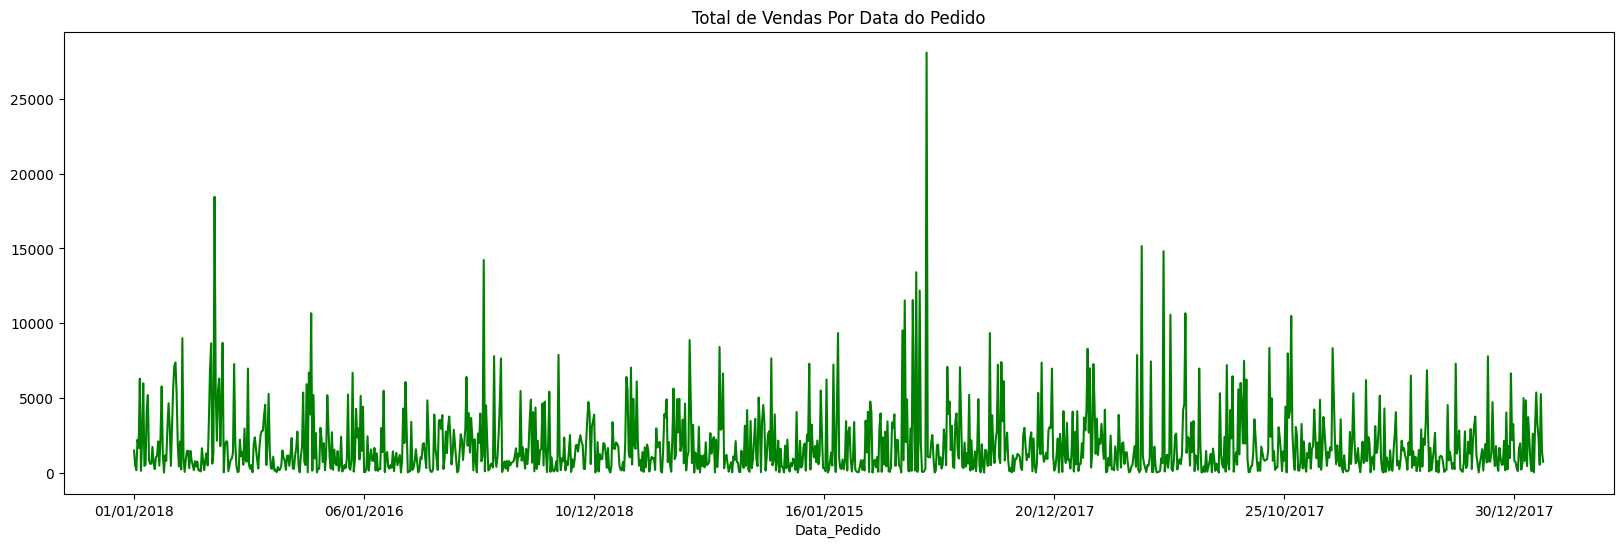

In [12]:
# Plot
plt.figure(figsize = (20, 6))
data_sales_period.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

In [13]:
data_sales_state = data.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [14]:
data_sales_state.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


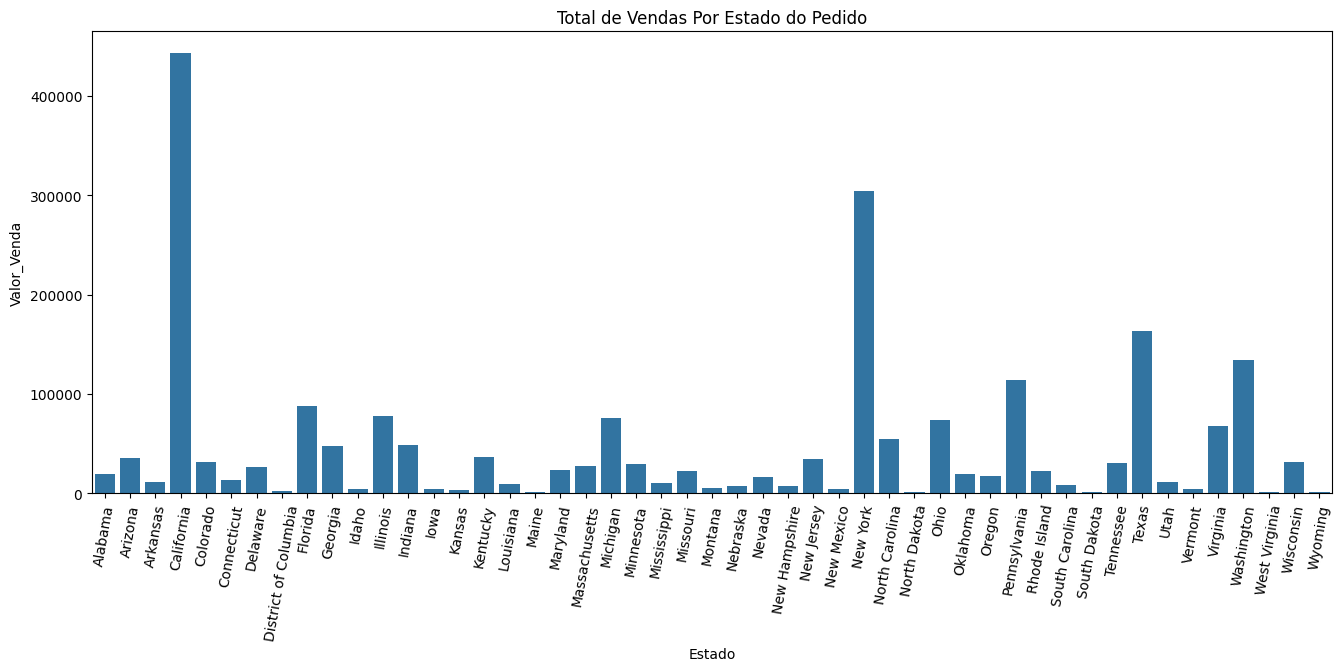

In [15]:
plt.figure(figsize = (16, 6))
sea.barplot(data = data_sales_state,
            y = 'Valor_Venda',
            x = 'Estado').set(title ='Total de Vendas Por Estado do Pedido')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.

In [16]:
data_sales_ten = data.groupby('Cidade')['Valor_Venda'].sum()

In [17]:
data_sales_ten

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          2724.244
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Valor_Venda, Length: 528, dtype: float64

In [18]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
data_state = data.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)

In [19]:
data_state

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


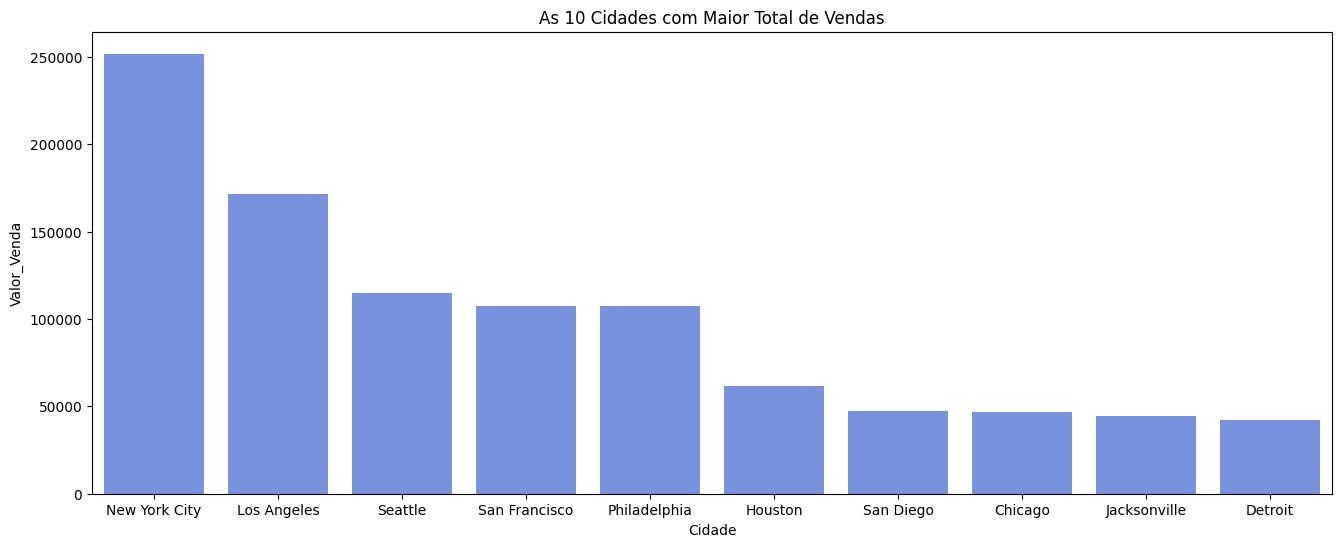

In [20]:
plt.figure(figsize = (16, 6))
sea.set_palette('coolwarm')
sea.barplot(data = data_state, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza

In [21]:
sales_total = data.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False)

In [22]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

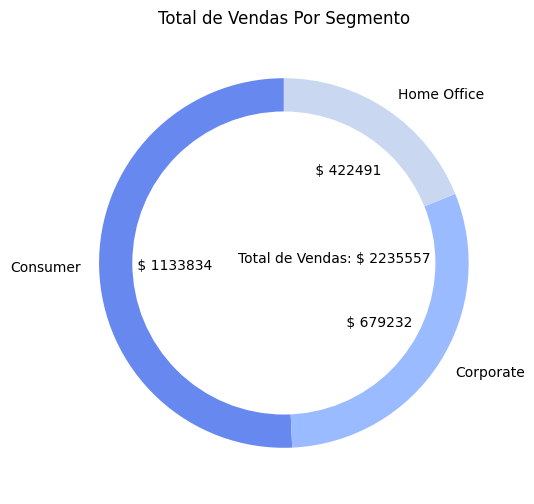

In [23]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(sales_total['Valor_Venda'], 
        labels = sales_total['Segmento'],
        autopct = autopct_format(sales_total['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(sales_total['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

Qual o Total de Vendas Por Segmento e Por Ano?

In [24]:
data['Data_Pedido'] = pd.to_datetime(data['Data_Pedido'], dayfirst = True)

In [25]:
data.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [26]:
data['Ano'] = data['Data_Pedido'].dt.year

In [27]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [28]:
data_vendas_ano = data.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [29]:
data_vendas_ano

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

Se o Valor_Venda for maior que 1000 recebe 15% de desconto. >

Se o Valor_Venda for menor que 1000 recebe 10% de desconto. <

Quantas Vendas Receberiam 15% de Desconto?

In [36]:
data.value_counts()

ID_Pedido       Data_Pedido  ID_Cliente  Segmento   Pais           Cidade          Estado        ID_Produto       Categoria        SubCategoria  Valor_Venda  Ano 
CA-2015-100006  2015-09-07   DK-13375    Consumer   United States  New York City   New York      TEC-PH-10002075  Technology       Phones        377.970      2015    1
CA-2018-126242  2018-11-19   MC-18100    Consumer   United States  Los Angeles     California    FUR-FU-10002685  Furniture        Furnishings   18.700       2018    1
CA-2018-126354  2018-02-03   SC-20380    Consumer   United States  Pembroke Pines  Florida       OFF-BI-10000301  Office Supplies  Binders       3.882        2018    1
                                                                                                 OFF-PA-10004381  Office Supplies  Paper         115.296      2018    1
CA-2018-126382  2018-06-03   HK-14890    Corporate  United States  Franklin        Tennessee     FUR-FU-10002960  Furniture        Furnishings   35.168       2018   

In [65]:
# Cria uma nova coluna de acordo com a regra definida acima
data['Desconto'] = np.where(data['Valor_Venda']> 1000, 0.15, 0.10)

In [66]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [67]:
data['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior. 

Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [77]:
# Media antes do desconto 15%:
data_plus['Valor_Venda'].mean()

2116.8078153172864

In [78]:
# Media depois do desconto 15%:
data_plus['Valor_Venda_Desconto'].mean()

1799.2866430196934

In [79]:
# Media antes do desconto 10%:
data_minus['Valor_Venda'].mean()

137.20402283890513

In [80]:
# Media depois do desconto 10%:
data_minus['Valor_Venda_Desconto'].mean()

123.48362055501461

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [87]:
data['Mes'] = data['Data_Pedido'].dt.month_name()

In [88]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,November
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,November
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,June
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,October
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,October


In [89]:
df_seg_year= data.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].mean()